In [1]:
import cv2
import matplotlib.pyplot as plt
import face_recognition
from datetime import datetime
import csv

/home/yojana-adhikari/Desktop/SmartAttendance/.venv/lib/python3.12/site-packages/face_recognition_models/__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


In [2]:
import numpy as np

def create_average_encodings(people_data):
    
    known_faces_dict = {}
    
    for name, image_paths in people_data.items():
        print(f"Processing images for: {name}")
        person_encodings = []
        
        for path in image_paths:
            try:
                # Load image and find face encoding
                image = face_recognition.load_image_file(path)
                encodings = face_recognition.face_encodings(image)
                
                if encodings:
                    person_encodings.append(encodings[0])
            except Exception as e:
                print(f"  - Could not process {path}: {e}")
        
        # Calculate and store the average encoding
        if person_encodings:
            average_encoding = np.mean(person_encodings, axis=0)
            known_faces_dict[name] = average_encoding
            print(f"  - Created average encoding for {name} from {len(person_encodings)} images.")
        else:
            print(f"  - No face encodings found for {name}.")
            
    return known_faces_dict

# Provided data
people_image_paths = {
    "Manish": [
        "/home/yojana-adhikari/Desktop/SmartAttendance/Man1.jpeg",
        "/home/yojana-adhikari/Desktop/SmartAttendance/Man2.jpeg"
    ],
    "Yojana": [
        "/home/yojana-adhikari/Desktop/SmartAttendance/Yoj1.jpeg",
        "/home/yojana-adhikari/Desktop/SmartAttendance/Yoj2.jpeg"
    ],
    "Sonam": [
        "/home/yojana-adhikari/Desktop/SmartAttendance/SONAM JPG_1.jpg",
        "/home/yojana-adhikari/Desktop/SmartAttendance/Sonam.jpg"
    ]
}

# Create the dictionary-based database with average encodings
known_faces_database = create_average_encodings(people_image_paths)

# Print the resulting database to verify
print("\nKnown Faces Database (Average Encodings):")
print(known_faces_database)

#get the current date for attendance
now=datetime.now()
current_date=now.strftime("%Y-%m-%d")

f=open(current_date+'.csv','w+',newline='')
lnwriter = csv.writer(f)


Processing images for: Manish
  - Created average encoding for Manish from 2 images.
Processing images for: Yojana
  - Created average encoding for Yojana from 2 images.
Processing images for: Sonam
  - Created average encoding for Sonam from 2 images.

Known Faces Database (Average Encodings):
{'Manish': array([-0.15061566, -0.01612285,  0.02385802, -0.01787817,  0.02936879,
       -0.05742027, -0.0038402 , -0.07678847,  0.2035961 , -0.08493287,
        0.18384122, -0.0040401 , -0.19366162, -0.10157219, -0.00115172,
        0.06364237, -0.13991514, -0.17321311, -0.08771301, -0.09666366,
        0.01731421,  0.03118341,  0.03453731,  0.05981108, -0.18960744,
       -0.35399449, -0.10622836, -0.18016892, -0.00392998, -0.06467608,
        0.01744278,  0.05803352, -0.19109138, -0.03258031,  0.03613826,
        0.06482201,  0.05704893, -0.02142605,  0.18699167,  0.03644469,
       -0.12361889, -0.04065848, -0.02167784,  0.2468661 ,  0.08076356,
        0.0577956 ,  0.01780646, -0.08508005,

In [ ]:
known_face_names = list(known_faces_database.keys())
print(known_face_names)
known_face_encodings = list(known_faces_database.values())

# Load the Haar cascade
face_cap = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start video capture
video_cap = cv2.VideoCapture(0)

face_encodings3 = None  # Placeholder for the encoding

while True:
    ret, video_data = video_cap.read()
    if not ret:
        break

    # Convert to grayscale for face detection
    gray = cv2.cvtColor(video_data, cv2.COLOR_BGR2GRAY)

    # Detect faces using Haar cascade
    faces = face_cap.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(video_data, (x, y), (x + w, y + h), (0, 255, 0), 2)

   

    # Display the frame
    cv2.imshow("Smart_Attendance_System", video_data)

    # Break loop when 'a' key is pressed
    if cv2.waitKey(10) == ord("a"):
        # Store encoding of the frame at the time of key press
        rgb_frame = cv2.cvtColor(video_data, cv2.COLOR_BGR2RGB)
        face_locationsNew = face_recognition.face_locations(rgb_frame)

        if face_locationsNew:
            face_encodingsNew = face_recognition.face_encodings(rgb_frame, known_face_locations=face_locationsNew)[0]
        break

# Release resources
video_cap.release()
cv2.destroyAllWindows()

# Optional: print or store the face encoding
if face_encodingsNew is not None:
    print("Face encoding captured:")
    print(face_encodingsNew)
else:
    print("No face encoding captured.")




['Manish', 'Yojana', 'Sonam']


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/yojana-adhikari/Desktop/SmartAttendance/.venv/lib/python3.12/site-packages/cv2/qt/plugins"


Face encoding captured:
[-0.19775999  0.02311452  0.04517898 -0.02104969 -0.07050732  0.01782279
  0.02660971 -0.09555661  0.19693744 -0.06699657  0.22456516 -0.0205387
 -0.31407461 -0.00490768 -0.0374329   0.08918131 -0.11779758 -0.17646031
 -0.11813439 -0.0487661   0.0804171  -0.03130928 -0.00448487  0.09181731
 -0.11381637 -0.401952   -0.09628692 -0.1535048   0.01623969 -0.07576576
 -0.02224545 -0.00858361 -0.20501024 -0.10008971  0.01602362  0.02646668
 -0.01049924 -0.12113342  0.20587675 -0.12244419 -0.23045813 -0.0723416
  0.15994464  0.16524754  0.14125851  0.05886169  0.01527576 -0.0514595
  0.08164598 -0.26017007  0.03457532  0.18734474  0.09363587  0.06228529
  0.13764814 -0.151333    0.02896144  0.07902226 -0.21449451  0.08703614
  0.02913137 -0.05805705 -0.01404357 -0.05320855  0.16789588  0.0639229
 -0.09270285 -0.12716231  0.23878808 -0.19266734  0.00232876  0.1163687
 -0.13513161 -0.28660628 -0.23547971  0.02639657  0.48383039  0.22683796
 -0.08148534  0.12302443 -0.1298

Face encoding captured:
[-0.19775999  0.02311452  0.04517898 -0.02104969 -0.07050732  0.01782279
  0.02660971 -0.09555661  0.19693744 -0.06699657  0.22456516 -0.0205387
 -0.31407461 -0.00490768 -0.0374329   0.08918131 -0.11779758 -0.17646031
 -0.11813439 -0.0487661   0.0804171  -0.03130928 -0.00448487  0.09181731
 -0.11381637 -0.401952   -0.09628692 -0.1535048   0.01623969 -0.07576576
 -0.02224545 -0.00858361 -0.20501024 -0.10008971  0.01602362  0.02646668
 -0.01049924 -0.12113342  0.20587675 -0.12244419 -0.23045813 -0.0723416
  0.15994464  0.16524754  0.14125851  0.05886169  0.01527576 -0.0514595
  0.08164598 -0.26017007  0.03457532  0.18734474  0.09363587  0.06228529
  0.13764814 -0.151333    0.02896144  0.07902226 -0.21449451  0.08703614
  0.02913137 -0.05805705 -0.01404357 -0.05320855  0.16789588  0.0639229
 -0.09270285 -0.12716231  0.23878808 -0.19266734  0.00232876  0.1163687
 -0.13513161 -0.28660628 -0.23547971  0.02639657  0.48383039  0.22683796
 -0.08148534  0.12302443 -0.1298

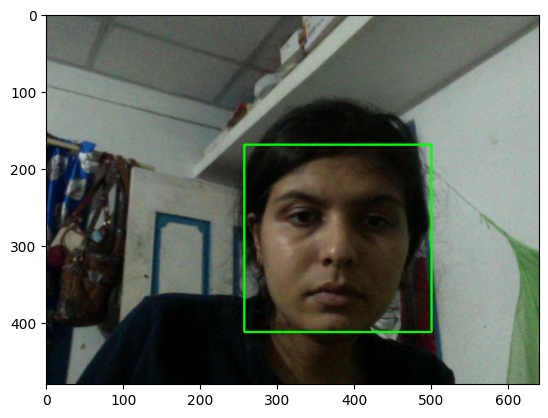

In [4]:
# Convert the frame to RGB (needed for face_recognition)
rgb_frame = cv2.cvtColor(video_data, cv2.COLOR_BGR2RGB)

# Use face_recognition's own face detection
face_locations = face_recognition.face_locations(rgb_frame)


plt.imshow(rgb_frame)

# Only encode if a face is found
if face_locations:
    face_encoding = face_recognition.face_encodings(rgb_frame, known_face_locations=face_locations)[0]
    print("Face encoding captured:")
    print(face_encoding)
else:
    print("No face found by face_recognition.")


In [ ]:

#matches = face_recognition.compare_faces([encodings], face_encodingsNew)
results = face_recognition.compare_faces(known_face_encodings, face_encodingsNew,tolerance=0.45)
print(results)

if True in results:
    matched_name = known_face_names[results.index(True)]
    print(f"Match found: {matched_name}")





[np.False_, np.True_, np.False_]
Match found: Yojana
['Manish', 'Sonam', 'Yojana']
